W pierwszej kolejności pobieram dane z Kaggle odnoszące się do danych marketingowych 
https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

In [1]:
import pandas as pd
import numpy as np
import os

data_path = r"E:\page_ds\tweaking_the_response_results"

dane = pd.read_csv(os.path.join(data_path, "bank-additional-full.csv"), sep=';')

In [ ]:
# przyglądnę się danym i ewentualnie zredukuję listę zmiennych
from dataprep.eda import create_report

report = create_report(dane, title='EDA dla kampanii marketingowej')
# przenoszę do przeglądarki
report.save(os.path.join(data_path, "EDA_dla_kampanii.html"))
report.show_browser()
report.show()


In [6]:
display(dane)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Akcje:
1. kodujemy _pdays_ na wartości 1 - gdy =999, 0 w przeciwnym wypadku
2. OHE dla zmiennych tekstowych
3. wywalam zmienne silnie skorelowane - emp.var.rate, euribor3m
4. month - wydaje się popsuta
5. duration - jest sugestia żeby nie dawac do modelu - zbyt silna zależnośc do y (brak kontaktu -> = 0 )
6. dokonuję próbkowania próbując zbalansować próbkę danych, która jest dość mocno niezbalansowana 

In [2]:
#dane numeryczne
dane._get_numeric_data().columns.difference(['pdays','emp.var.rate','euribor3m','duration']).tolist()


['age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'duration',
 'nr.employed',
 'previous']

In [4]:
dane.select_dtypes(include=['object']).columns.difference(['y']).tolist()

['contact',
 'day_of_week',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome']

In [2]:
# dodanie zmiennych kategorycznych

cat_vars=dane.select_dtypes(include=['object']).columns.difference(['y']).tolist()
for var in cat_vars:
    cat_list = pd.get_dummies(dane[var], prefix=var)
    data1 = dane.join(cat_list)
    dane = data1


In [3]:
# mamy rozszerzony zbiór danych, trzeba to połączyć i oczyścić 
data_vars = dane.columns.difference(cat_vars).tolist()
#to_keep=[i for i in data_vars if i not in cat_vars]
data_final=dane[data_vars]
data_final.columns.values

array(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'default_no', 'default_unknown', 'default_yes',
       'duration', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'emp.var.rate',
       'euribor3m', 'housing_no', 'housing_unknown', 'housing_yes',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'loan_no',
       'loan_unknown', 'loan_yes', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'month_apr', 'month_aug',
       'month_dec', '

In [25]:
display(data_final)

,age,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,...,month_nov,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,y
0,56,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
1,57,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
2,37,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
3,40,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
4,56,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,yes
41184,46,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,no
41185,56,2,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,no
41186,44,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,yes


In [4]:
# kodowanie zmiennej celu na zera i jedynku
data_final = pd.DataFrame(data_final)
data_final.loc[:,'y'] = data_final['y'].replace(['no','yes'], [0,1]).tolist()

In [46]:
display(data_final)

,age,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,...,month_nov,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,y
0,56,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
1,57,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
2,37,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
3,40,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
4,56,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,1
41184,46,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,0
41185,56,2,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,0
41186,44,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,1


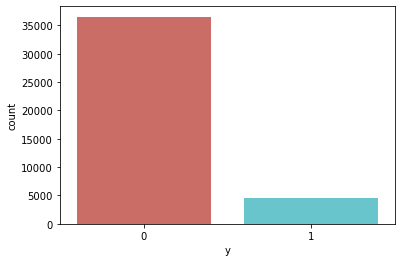

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'y', data=data_final,  palette='hls')
plt.show()


##### SMOTE
Więcej informacji można znaleźć na stronie https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#from sklearn.base import _ClassNamePrefixFeaturesOutMixin

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=128262)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=128262)
columns = X_train.columns

os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


In [7]:

# sprawdzenie czy dane zostały zbalansowane
print("Długość zbioru nadpróbkowego:",len(os_data_X))
print("Liczba pozytywnych targetów:",len(os_data_y[os_data_y['y']==1]))
print("Liczba negatywnych targetów:",len(os_data_y[os_data_y['y']==0]))
print("Proporcja pozytywnych targetów:",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
print("Proporcja negatywnych targetów:",len(os_data_y[os_data_y['y']==0])/len(os_data_X))

Długość zbioru nadpróbkowego: 58574
Liczba pozytywnych targetów: 29287
Liczba negatywnych targetów: 29287
Proporcja pozytywnych targetów: 0.5
Proporcja negatywnych targetów: 0.5


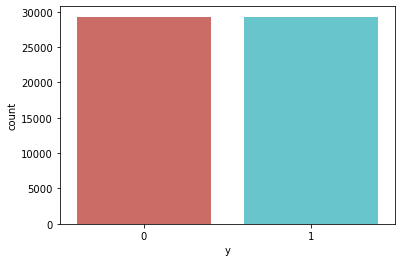

In [8]:
sns.countplot(x= 'y', data=os_data_y,  palette='hls')
plt.show()

#### Bubujemy model z losowo dobranymi hiperparametramiimport xgboost as xgb

Dokładność dla zbioru walidacyjnego: 0.9085
Dokładność dla zbioru traningowego oryginalnego: 0.9262
Dokładność dla zbioru traningowego zbalansowanego: 0.9581
Wartość parametru Gini na zbiorze walidacyjnym to: 0.8842
Wartość parametru Gini na zbiorze treningowym to: 0.9147
Wartość parametru Gini na zbiorze zbalansowanym to: 0.9890

ROC Curve

Confusion Matrix


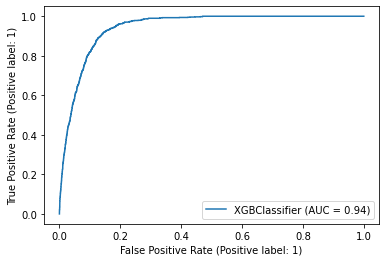

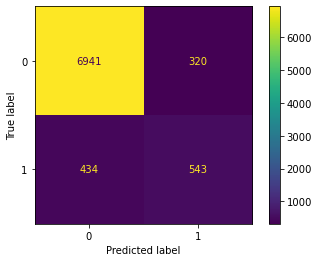

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

xgb_clf = xgb.XGBClassifier(max_depth=3,
                            n_estimators=100,
                            objective='binary:logistic',
                            booster='gbtree',
                            n_jobs=-1,
                            random_state=1)

# uczymy model, korzystamy z API sklearn
xgb_clf.fit(os_data_X, os_data_y)

# przeliczamy skoringi na zbiorze testowym aby sprawdzić jakość modelu w rozumieniu interesujących mnie miar
y_hat = xgb_clf.predict(X_test)

auc_val = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auc_train = roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:, 1])
auc_train_os = roc_auc_score(os_data_y, xgb_clf.predict_proba(os_data_X)[:, 1])


print("Dokładność dla zbioru walidacyjnego: {0:.4f}".format(accuracy_score(y_test, y_hat)))
print("Dokładność dla zbioru traningowego oryginalnego: {0:.4f}".format(accuracy_score(y_train, xgb_clf.predict(X_train))))
print("Dokładność dla zbioru traningowego zbalansowanego: {0:.4f}".format(accuracy_score(os_data_y, xgb_clf.predict(os_data_X))))


print("Wartość parametru Gini na zbiorze walidacyjnym to: {0:.4f}".format(2*auc_val-1)) # Gini = 2*AUC-1
print("Wartość parametru Gini na zbiorze treningowym to: {0:.4f}".format(2*auc_train-1)) # Gini = 2*AUC-1
print("Wartość parametru Gini na zbiorze zbalansowanym to: {0:.4f}".format(2*auc_train_os-1)) # Gini = 2*AUC-1


print("\nROC Curve")
print(RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test))
#RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
#plt.savefig(r"E:\page_ds\XGBoost_step_by_step\foto\2_ROC_cur_clf.png", format="png" , dpi=300, facecolor="White")

print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_hat, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb_clf.classes_)
print(disp.plot())
#wyk = disp.plot()
#plt.savefig(r"E:\page_ds\XGBoost_step_by_step\foto\1_conf_matrix_clf.png", format="png" , dpi=300, facecolor="White")
#lt.show()




## Należy sprawdzić które zmienne najmocniej wpływają na model (shap) i wywalam duration


In [10]:
import shap

booster_xgb = xgb_clf.get_booster()
shap_values_xgb = booster_xgb.predict(xgb.DMatrix(os_data_X, os_data_y),
                                      pred_contribs=True)

In [11]:
shap_values_xgb = shap_values_xgb[:, :-1].copy()

In [40]:
shap_values_xgb.shape

(58574, 63)

In [35]:
os_data_X.shape

(58574, 63)

In [36]:
X_train.shape

(32950, 63)

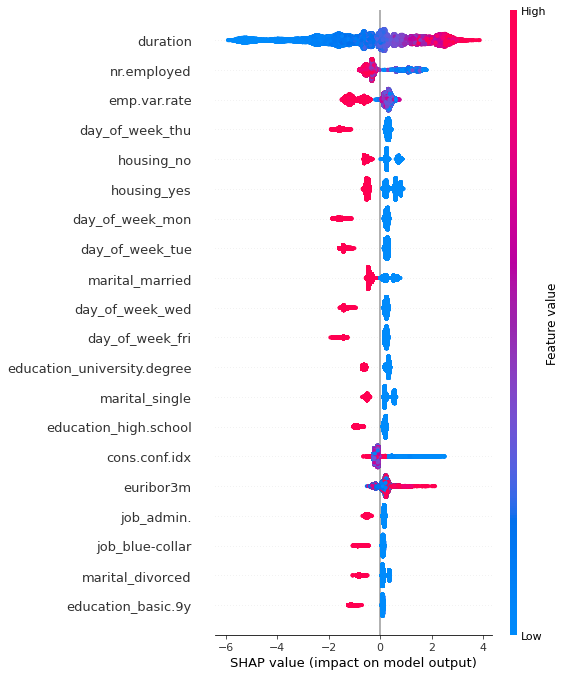

In [12]:
import matplotlib.pyplot as plt
#f = plt.figure()
shap.summary_plot(shap_values_xgb, os_data_X, feature_names=os_data_X.columns) # , show=False
#plt.title('Szczegółowy wykres mocy charakterystyk - summary_plot')
#f.savefig(os.path.join(ptah_pict, '2_xgb_summary_det.png'),  format='png', dpi=600 , facecolor='White')

Zgodnie z przewidywaniami, zmienna duration zabija cały model i staje się wróżką, wywalam ją ze zbioru danych

Dokładność dla zbioru walidacyjnego: 0.8880
Dokładność dla zbioru traningowego oryginalnego: 0.9011
Dokładność dla zbioru traningowego zbalansowanego: 0.9353
Wartość parametru Gini na zbiorze walidacyjnym to: 0.5511
Wartość parametru Gini na zbiorze treningowym to: 0.6297
Wartość parametru Gini na zbiorze zbalansowanym to: 0.9490

ROC Curve

Confusion Matrix


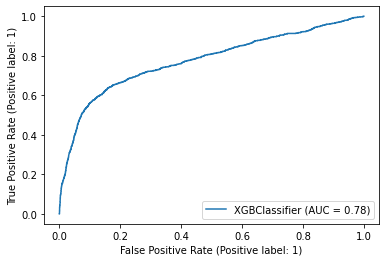

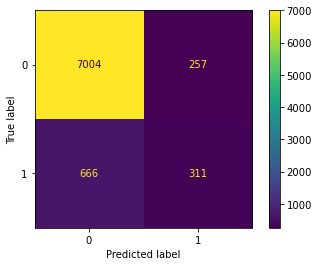

In [13]:
# powtarzam te same przeliczenia na ograniczonym zbiorze charakterystyk
data_vars = list(set(data_vars).difference(['pdays','emp.var.rate','euribor3m','duration']))
data_final=dane[data_vars]
data_final.columns.values

data_final = pd.DataFrame(data_final)
data_final.loc[:,'y'] = data_final['y'].replace(['no','yes'], [0,1]).tolist()

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=128262)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=128262)
columns = X_train.columns

os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


xgb_clf = xgb.XGBClassifier(max_depth=3,
                            n_estimators=100,
                            objective='binary:logistic',
                            booster='gbtree',
                            n_jobs=-1,
                            random_state=1)

# uczymy model, korzystamy z API sklearn
xgb_clf.fit(os_data_X, os_data_y)

# przeliczamy skoringi na zbiorze testowym aby sprawdzić jakość modelu w rozumieniu interesujących mnie miar
y_hat = xgb_clf.predict(X_test)

auc_val = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auc_train = roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:, 1])
auc_train_os = roc_auc_score(os_data_y, xgb_clf.predict_proba(os_data_X)[:, 1])


print("Dokładność dla zbioru walidacyjnego: {0:.4f}".format(accuracy_score(y_test, y_hat)))
print("Dokładność dla zbioru traningowego oryginalnego: {0:.4f}".format(accuracy_score(y_train, xgb_clf.predict(X_train))))
print("Dokładność dla zbioru traningowego zbalansowanego: {0:.4f}".format(accuracy_score(os_data_y, xgb_clf.predict(os_data_X))))


print("Wartość parametru Gini na zbiorze walidacyjnym to: {0:.4f}".format(2*auc_val-1)) # Gini = 2*AUC-1
print("Wartość parametru Gini na zbiorze treningowym to: {0:.4f}".format(2*auc_train-1)) # Gini = 2*AUC-1
print("Wartość parametru Gini na zbiorze zbalansowanym to: {0:.4f}".format(2*auc_train_os-1)) # Gini = 2*AUC-1


print("\nROC Curve")
print(RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test))
#RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
#plt.savefig(r"E:\page_ds\XGBoost_step_by_step\foto\2_ROC_cur_clf.png", format="png" , dpi=300, facecolor="White")

print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_hat, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb_clf.classes_)
print(disp.plot())


Od razu wygląda bardziej realnie, zobaczymy teraz jak to wygląda na mocy zmiennych czy nie ma czegoś odstającego od reszty

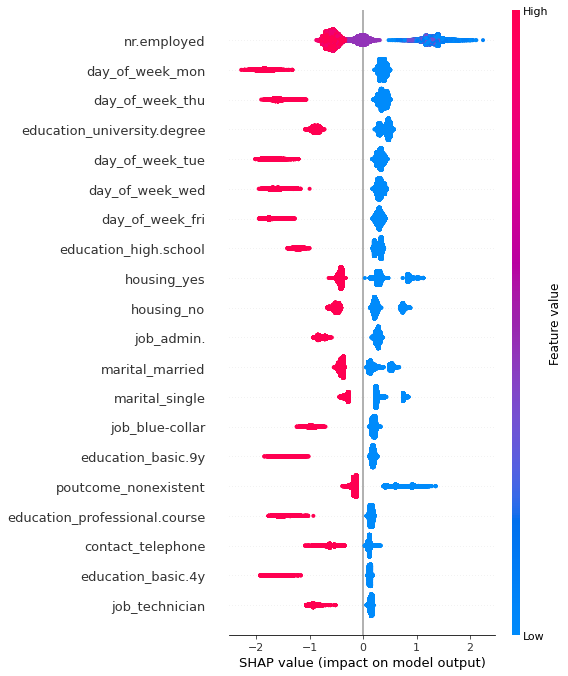

In [14]:
booster_xgb = xgb_clf.get_booster()
shap_values_xgb = booster_xgb.predict(xgb.DMatrix(os_data_X, os_data_y),
                                      pred_contribs=True)

shap_values_xgb = shap_values_xgb[:, :-1].copy()

shap.summary_plot(shap_values_xgb, os_data_X, feature_names=os_data_X.columns) # , show=False

teraz spróbuję narysować krzywą Lorenza

In [15]:
GiniSet = pd.DataFrame(list(zip(xgb_clf.predict_proba(X_train)[:,1].tolist(),\
                                y_train['y'].tolist())), columns=['proba', 'target'] )

GiniSet.sort_values(by = ['proba'], inplace=True)
GiniSet.reset_index(inplace=True)

In [87]:
display(GiniSet)

,index,proba,target
0,24111,0.008693,0
1,32227,0.008877,0
2,23573,0.008910,0
3,1475,0.010254,0
4,4318,0.010520,0
...,...,...,...
32945,27545,0.934839,1
32946,28359,0.935165,1
32947,22311,0.937931,1
32948,24425,0.939503,1


In [16]:
GiniSet['index'] =  GiniSet.index

In [17]:
display(GiniSet)

,index,proba,target
0,0,0.008693,0
1,1,0.008877,0
2,2,0.008910,0
3,3,0.010254,0
4,4,0.010520,0
...,...,...,...
32945,32945,0.934839,1
32946,32946,0.935165,1
32947,32947,0.937931,1
32948,32948,0.939503,1


Dodaję teraz skumulowaną wartość indexu oraz skumulowaną wartość liczby wartości target = 1

In [18]:
max_idx = np.max(GiniSet['index'])
GiniSet['index'] = GiniSet['index']/max_idx 

sum_target = np.sum(GiniSet['target'])
GiniSet['target'] = np.cumsum(GiniSet['target'])/sum_target

In [19]:
display(GiniSet)

,index,proba,target
0,0.000000,0.008693,0.000000
1,0.000030,0.008877,0.000000
2,0.000061,0.008910,0.000000
3,0.000091,0.010254,0.000000
4,0.000121,0.010520,0.000000
...,...,...,...
32945,0.999879,0.934839,0.998908
32946,0.999909,0.935165,0.999181
32947,0.999939,0.937931,0.999454
32948,0.999970,0.939503,0.999727


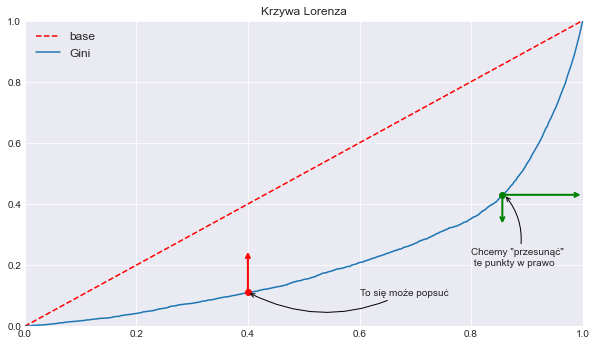

In [31]:
import seaborn as sns
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(10,9/16*10))
plt.plot([0, 1.0], [0, 1.0],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot(GiniSet['index'].tolist(), GiniSet['target'].tolist(), )
ax.legend(['base', 'Gini'], facecolor='w', fontsize = 'large')

ax.annotate('Chcemy "przesunąć" \n te punkty w prawo', xy=(0.86,0.43), xytext=(0.8,0.2), arrowprops=\
            dict(arrowstyle='->',  linewidth=1, connectionstyle='arc3, rad=0.25'))

ax.annotate('', xy=(1.0,0.43), xytext=(0.856,0.43), arrowprops=dict(arrowstyle='->', linewidth=2, color='green'))
ax.annotate('', xy=(0.856,0.33), xytext=(0.856,0.43), arrowprops=dict(arrowstyle='->', linewidth=2, color='green'))



ax.plot(0.4, 0.111, c='red', marker='o')
ax.plot(0.856,0.43, c='green', marker='o')

ax.annotate('To się może popsuć', xy=(0.4,0.111), xytext=(0.6,0.1), arrowprops=\
            dict(arrowstyle='->',  linewidth=1, connectionstyle='arc3, rad=-0.25'))

ax.annotate('', xy=(0.4, 0.25), xytext=(0.4,0.111), arrowprops=dict(arrowstyle='->', linewidth=2, color='red'))

plt.title('Krzywa Lorenza')
plt.show()

Idea jest taka, żeby wykorzystać algorytm optuny do zaproponowania takich hiperparametrów, które przybliżą właśnie wskazany punkt możliwe kosztem czerwonego. Aby to uzyskać musimy wbrać % populacji, który chcemy "przykleić" do osi y oraz funkcję, którą będziemy w związku z tym optymalizować. 

In [21]:
# najpierw definiujemy funkcję, która będzie zwracać wartość punktu na wykresie Giniego- celem będzie 
# jej minimalizacja w zadanym punkcie X (oznaczający jaką część populacji np. chcemy wysłać do kampanii) 
def customize_gini_curve(X_cut, y_proba, y):
    if X_cut >= 1 or X_cut <= 0:
        X_cut = 0.5
    GiniSet_ = pd.DataFrame(list(zip(y_proba,  y)), columns=['proba', 'target'] )
    GiniSet_.sort_values(by = ['proba'], inplace=True)
    GiniSet_.reset_index(inplace=True)
    max_idx = np.max(GiniSet_['index'])
    GiniSet_['index'] = GiniSet_['index']/max_idx 
    sum_target = np.sum(GiniSet_['target'])
    GiniSet_['target'] = np.cumsum(GiniSet_['target'])/sum_target
    return GiniSet_.iloc[int(np.floor(GiniSet_.shape[0]*X_cut)), 2]
    
    
    

In [29]:
customize_gini_curve(0.856, xgb_clf.predict_proba(X_train)[:,1].tolist(), y_train['y'].tolist())

0.4286104286104286

In [53]:
import optuna

def objective(trial):
    # definiujemy zbiór treningowy ustawiając ten sam random state dla powtarzalności losowania
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=128262)
    os_data_X, os_data_y=os.fit_resample(X_train, y_train)
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

    #API niekompaktybilne z scikit
    dtrain = xgb.DMatrix(X_train, label = y_train)
    dtest = xgb.DMatrix(X_test, label = y_test)

    #https://xgboost.readthedocs.io/en/stable/parameter.html
    param = {
            #"silent": 1,
             "objective": "binary:logistic",
             "eval_metric": "auc",
             "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
             "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
             "alpha": trial.suggest_loguniform("alpha",1e-8, 1.0),
            }
    
    # parametry dodatkowe dla rodzajów boostera (jest jeszcze gblinear, którego tutaj nie umieszczałem)
    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1,9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma",1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise","lossguide"])
    
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform","weighted"])
        param["normalize_type"]= trial.suggest_categorical("normalize_type", ["tree","forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    # dodanie elementów wczesnego przerwania Triala w sytuacji gdy jest nierokujący
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain,  evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)

    preds = bst.predict(dtest)
    gini_point = customize_gini_curve(0.8, list(preds), list(y_test['y']))
    return gini_point

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials = 200)
print(study.best_trial)

In [55]:
print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Best params:
	booster: dart
	lambda: 2.4811635189491823e-07
	alpha: 0.005170148193729972
	max_depth: 5
	eta: 0.8611647894369349
	gamma: 0.036256117623736595
	grow_policy: depthwise
	sample_type: weighted
	normalize_type: forest
	rate_drop: 5.513401203501515e-06
	skip_drop: 1.4932665117015075e-08


In [57]:
xgb_clf_opt = xgb.XGBClassifier(max_depth=3,
                                n_estimators=100,
                                reg_lambda = 2.4811635189491823e-07,
                                alpha = 0.005170148193729972,
                                eta = 0.8611647894369349,
                                gamma = 0.036256117623736595,
                                sample_type = 'weighted',
                                normalize_type = 'forest',
                                rate_drop = 5.513401203501515e-06,
                                skip_drop = 1.4932665117015075e-08,
                                objective='binary:logistic',
                                booster='dart',
                                n_jobs=-1,
                                random_state=1)

# uczymy model, korzystamy z API sklearn
xgb_clf_opt.fit(os_data_X, os_data_y)

XGBClassifier(alpha=0.005170148193729972, base_score=0.5, booster='dart',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8611647894369349,
              eval_metric=None, gamma=0.036256117623736595, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.861164808,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              normalize_type='forest', num_parallel_tree=1, predictor='auto', ...)

In [58]:
GiniSetOpt = pd.DataFrame(list(zip(xgb_clf_opt.predict_proba(X_train)[:,1].tolist(),\
                                y_train['y'].tolist())), columns=['proba', 'target'] )

GiniSetOpt.sort_values(by = ['proba'], inplace=True)
GiniSetOpt.reset_index(inplace=True)

In [59]:
GiniSetOpt['index'] =  GiniSetOpt.index

In [61]:
max_idx_opt = np.max(GiniSetOpt['index'])
GiniSetOpt['index'] = GiniSetOpt['index']/max_idx_opt 

sum_target_opt = np.sum(GiniSetOpt['target'])
GiniSetOpt['target'] = np.cumsum(GiniSetOpt['target'])/sum_target_opt

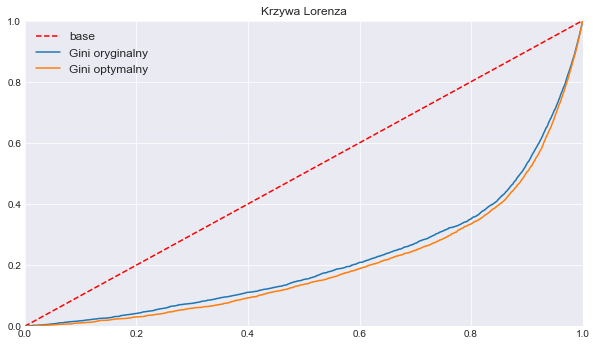

In [62]:
import seaborn as sns
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(10,9/16*10))
plt.plot([0, 1.0], [0, 1.0],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot(GiniSet['index'].tolist(), GiniSet['target'].tolist() )
plt.plot(GiniSetOpt['index'].tolist(), GiniSetOpt['target'].tolist() )

ax.legend(['base', 'Gini oryginalny', 'Gini optymalny'], facecolor='w', fontsize = 'large')


#ax.annotate('', xy=(1.0,0.43), xytext=(0.856,0.43), arrowprops=dict(arrowstyle='->', linewidth=2, color='green'))
#ax.annotate('', xy=(0.856,0.33), xytext=(0.856,0.43), arrowprops=dict(arrowstyle='->', linewidth=2, color='green'))

plt.title('Krzywa Lorenza')
plt.show()

In [63]:
print("wielkość GINI dla 80% populacji to: {0:.4f}".format(customize_gini_curve(0.8, GiniSet['index'].tolist(), GiniSet['target'].tolist())))
print("wielkość GINI dla 80% populacji to: {0:.4f}".format(customize_gini_curve(0.8,GiniSetOpt['index'].tolist(), GiniSetOpt['target'].tolist())))

wielkość GINI dla 80% populacji to: 0.4766274704293168
wielkość GINI dla 80% populacji to: 0.45468109488321484
